In [1]:
import numpy as np
import pandas as pd

In [2]:
blood_transfusion = pd.read_csv("data/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

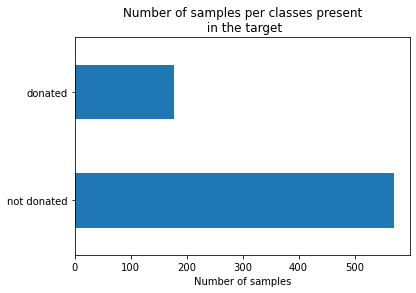

In [3]:
import matplotlib.pyplot as plt

target.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [4]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0, test_size=0.5)

In [5]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(data_train, target_train)

LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score

target_predicted = classifier.predict(data_test)

accuracy = accuracy_score(target_test, target_predicted)

## 둘다 같은 결과를 보여줌

np.mean(target_test == target_predicted)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.778


### Confusion matrix and derived metrics

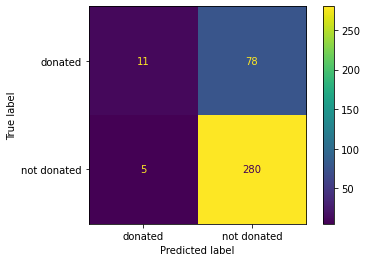

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, data_test, target_test)

TP / FN

* 

FP /TN

### Precision_score, recall_score
* precision_score => 예측 label 을 기반으로 계산 11/16

* recall_score => 실제 label을 기준으로 계산 11/89

In [10]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(target_test, target_predicted, pos_label="donated")
recall = recall_score(target_test, target_predicted, pos_label="donated")

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.688
Recall score: 0.124


* we could ask ourself a reasonable question. While the accuracy did not look bad (i.e. 77%), the recall score is relatively low (i.e. 12%).


In [11]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(data_test, target_test):.3f}")

Accuracy of the dummy classifier: 0.762


### balanced_accuracy

* When the classes are imbalanced, `accuracy should not be used`. In this case, one should either use the precision and recall as presented above or the balanced accuracy score instead of accuracy.

In [12]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(target_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.553


### Sample에 대한 개별 평가 결과를 볼 수 있다.

* classifier.predict_proba

In [14]:
target_proba_predicted = pd.DataFrame(classifier.predict_proba(data_test),
                                      columns=classifier.classes_)
target_proba_predicted

,donated,not donated
0,0.271820,0.728180
1,0.451764,0.548236
2,0.445211,0.554789
3,0.441577,0.558423
4,0.870583,0.129417
...,...,...
369,0.178359,0.821641
370,0.361963,0.638037
371,0.069163,0.930837
372,0.325326,0.674674


In [15]:
equivalence_pred_proba = (
    target_proba_predicted.idxmax(axis=1).to_numpy() == target_predicted)
np.all(equivalence_pred_proba)

True

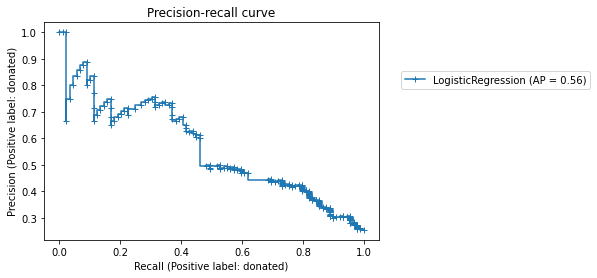

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier, data_test, target_test, pos_label='donated',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

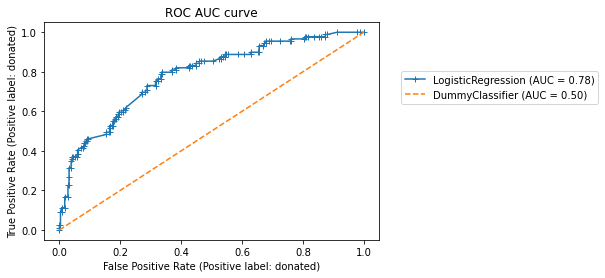

In [19]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier, data_test, target_test, pos_label='donated',
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, data_test, target_test, pos_label='donated',
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")